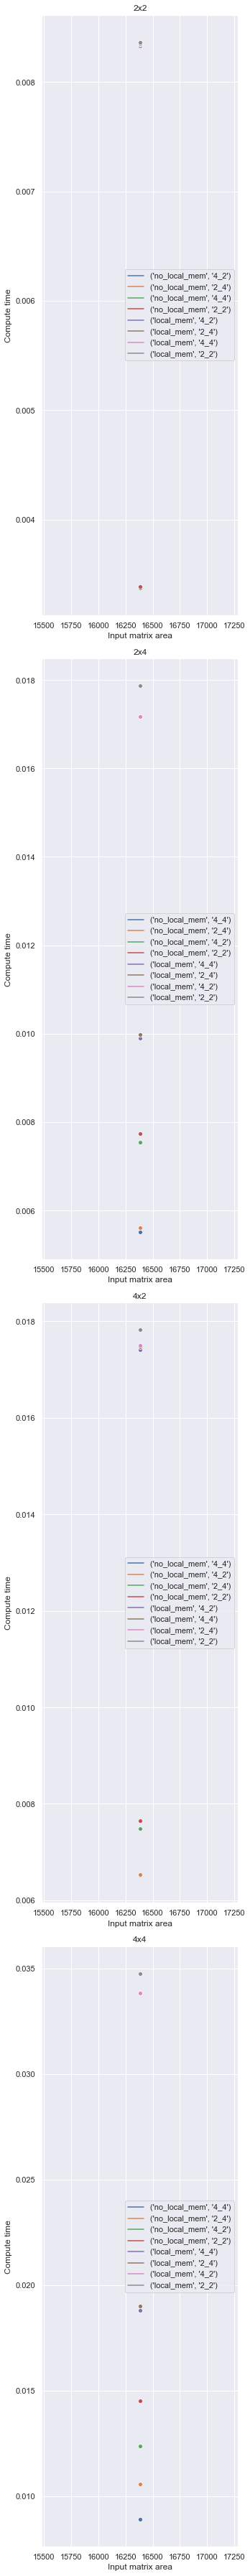

In [4]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multimat"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix area", "Input left matrices", "Input right matrices"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")


sns.set(rc={'figure.figsize': (5, 50)})
fig, axes = plt.subplots(nrows=results["Input left matrices"].nunique() * results["Input right matrices"].nunique())

plot_idx = 0

results = results[results["Input matrix area"] < 256*256]

for left_mat in results["Input left matrices"].unique():
    for right_mat in results["Input right matrices"].unique():
        filtered = results[(results["Input left matrices"] == left_mat) & (results["Input right matrices"] == right_mat)]

        # top_args = filtered[filtered["Input matrix area"] == 128*128].head(1)["Args"]
        #
        # top_results = filtered[filtered["Args"].isin(top_args)]
        ax = sns.lineplot(data=filtered, x="Input matrix area", y="Compute time", hue=filtered[["Name", "Args"]].apply(tuple, axis=1), marker='o', ax=axes[plot_idx])
        plot_idx += 1

        ax.set_title(f"{left_mat}x{right_mat}")

fig.tight_layout()

   Input matrix rows   Speedup
0                128  2.114355
1                256  2.460621
2                512  2.583439


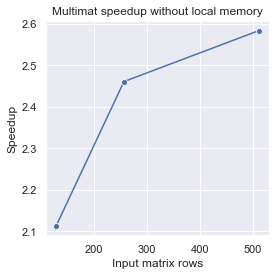

In [20]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multimat"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows", "Input left matrices", "Input right matrices"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (4, 4)})
fig, axes = plt.subplots()

#results = results[results["Input matrix area"] < 256*256]


filtered = results[(results["Input left matrices"] == 4) & (results["Input right matrices"] == 4)]

# top_args = filtered[filtered["Input matrix area"] == 128*128].head(1)["Args"]
#
# top_results = filtered[filtered["Args"].isin(top_args)]
filtered = filtered[filtered["Args"] == "4_4"]

no_local_mem = filtered[filtered["Name"] == "no_local_mem"]
local_mem = filtered[filtered["Name"] == "local_mem"]

diff = local_mem.set_index("Input matrix rows")["Compute time"] / no_local_mem.set_index("Input matrix rows")["Compute time"]

diff.name = "Speedup"
diff = diff.reset_index()
print(diff)

ax = sns.lineplot(data=diff, x="Input matrix rows", y="Speedup", marker='o', ax=axes)


ax.set_title(f"Multimat speedup without local memory")

fig.tight_layout()

   Args  Input matrix rows   Speedup
0   4_4                128  2.114355
1   2_4                128  1.798587
2   4_2                128  2.735106
3   2_2                128  2.395132
4   4_4                256  2.460621
5   2_4                256  1.981632
6   4_2                256  3.063625
7   2_2                256  2.617372
8   4_4                512  2.583439
9   2_4                512  2.039328
10  4_2                512  3.169216
11  2_2                512  2.696407


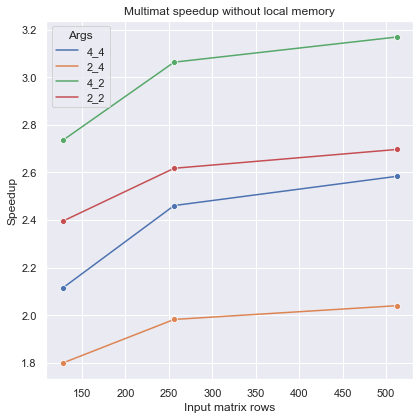

In [31]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multimat"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows", "Input left matrices", "Input right matrices"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (6, 6)})
fig, axes = plt.subplots()

#results = results[results["Input matrix area"] < 256*256]


filtered = results[(results["Input left matrices"] == 4) & (results["Input right matrices"] == 4)]

# top_args = filtered[filtered["Input matrix area"] == 128*128].head(1)["Args"]
#
# top_results = filtered[filtered["Args"].isin(top_args)]

no_local_mem = filtered[filtered["Name"] == "no_local_mem"]
local_mem = filtered[filtered["Name"] == "local_mem"]

diff = local_mem.set_index(["Args", "Input matrix rows"])["Compute time"] / no_local_mem.set_index(["Args", "Input matrix rows"])["Compute time"]

diff.name = "Speedup"
diff = diff.reset_index()
print(diff)

ax = sns.lineplot(data=diff, x="Input matrix rows", y="Speedup", marker='o', hue="Args", ax=axes)


ax.set_title(f"Multimat speedup without local memory")

fig.tight_layout()

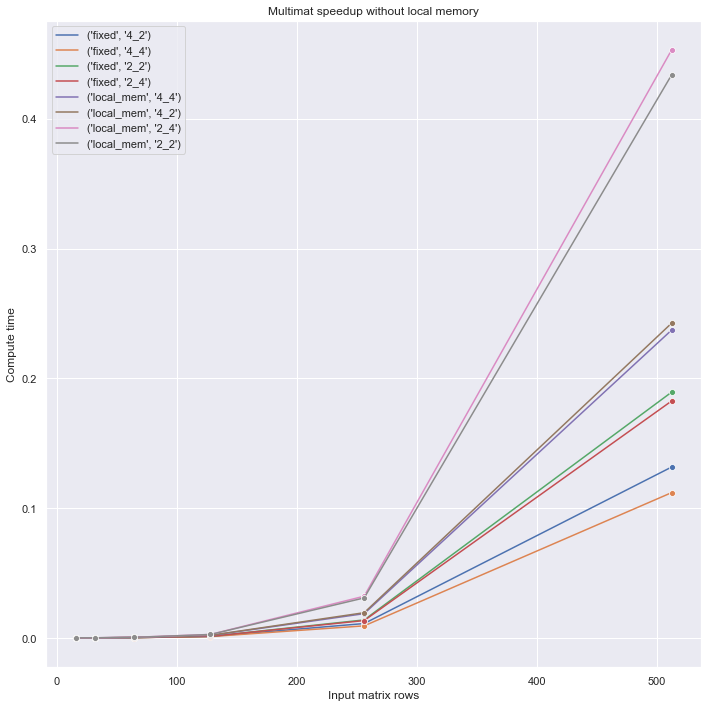

In [32]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multirow"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (10, 10)})
fig, axes = plt.subplots()

#results = results[results["Input matrix area"] < 256*256]



# top_args = filtered[filtered["Input matrix area"] == 128*128].head(1)["Args"]
#
# top_results = filtered[filtered["Args"].isin(top_args)]

ax = sns.lineplot(data=results, x="Input matrix rows", y="Compute time", marker='o', hue=results[["Name", "Args"]].apply(tuple, axis=1), ax=axes)


ax.set_title(f"Multimat speedup without local memory")

fig.tight_layout()

   Args  Input matrix rows   Speedup
0   2_2                 16  1.065762
1   2_2                 32  1.168622
2   2_2                 64  1.457166
3   2_2                128  2.033649
4   2_2                256  2.210787
5   2_2                512  2.290127
6   2_4                 16  1.050780
7   2_4                 32  1.179412
8   2_4                 64  1.644582
9   2_4                128  2.120095
10  2_4                256  2.391865
11  2_4                512  2.480633
12  4_2                 16  1.084208
13  4_2                 32  1.143096
14  4_2                 64  1.359288
15  4_2                128  1.639400
16  4_2                256  1.747519
17  4_2                512  1.841126
18  4_4                 16  1.073920
19  4_4                 32  1.131289
20  4_4                 64  1.380499
21  4_4                128  1.735574
22  4_4                256  1.997826
23  4_4                512  2.117734


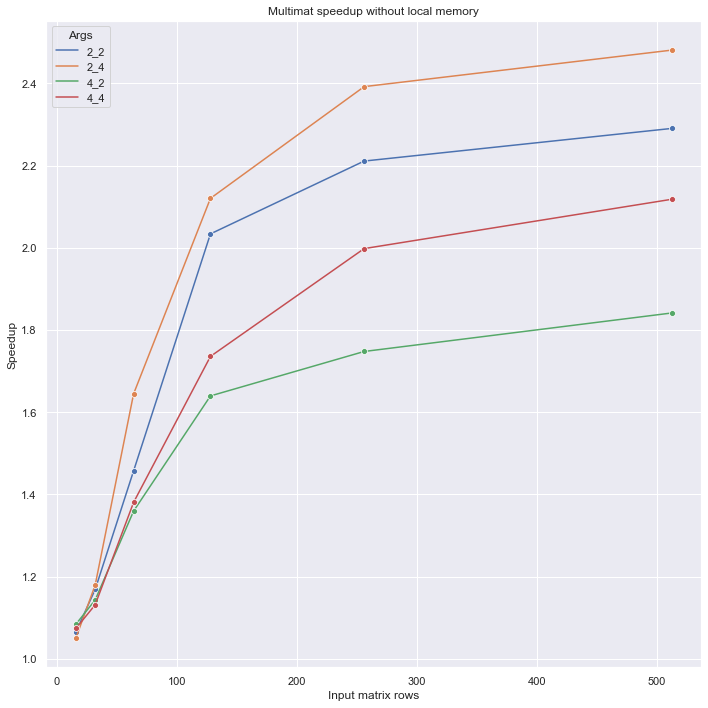

In [29]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multirow"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (10, 10)})
fig, axes = plt.subplots()

#results = results[results["Input matrix area"] < 256*256]



# top_args = filtered[filtered["Input matrix area"] == 128*128].head(1)["Args"]
#
# top_results = filtered[filtered["Args"].isin(top_args)]

no_local_mem = results[results["Name"] == "fixed"]
local_mem = results[results["Name"] == "local_mem"]

diff = local_mem.set_index(["Args", "Input matrix rows"])["Compute time"] / no_local_mem.set_index(["Args", "Input matrix rows"])["Compute time"]

diff.name = "Speedup"
diff = diff.reset_index()
print(diff)

ax = sns.lineplot(data=diff, x="Input matrix rows", y="Speedup", marker='o', hue="Args", ax=axes)


ax.set_title(f"Multimat speedup without local memory")

fig.tight_layout()

   Input matrix rows   Speedup
0                 16  1.254866
1                 32  1.326289
2                 64  1.916455
3                128  2.115454
4                192  2.351760
5                256  2.459559
6                320  2.516907
7                384  2.556098
8                448  2.572480
9                512  2.590146


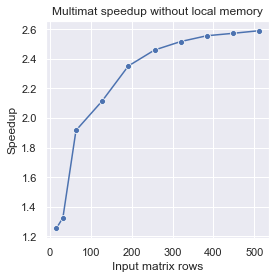

In [6]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multimat_for_text"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (4, 4)})
fig, axes = plt.subplots()

no_local_mem = results[results["Name"] == "no_local_mem"]
local_mem = results[results["Name"] == "local_mem"]

diff = local_mem.set_index("Input matrix rows")["Compute time"] / no_local_mem.set_index("Input matrix rows")["Compute time"]

diff.name = "Speedup"
diff = diff.reset_index()
print(diff)

ax = sns.lineplot(data=diff, x="Input matrix rows", y="Speedup", marker='o', ax=axes)


ax.set_title(f"Multimat speedup without local memory")

#fig.tight_layout()
fig.savefig("multimat_speedup.svg", format="svg")

   Input matrix rows   Speedup
0                 16  1.079184
1                 32  1.138425
2                 64  1.375842
3                128  1.743173
4                192  1.912593
5                256  2.002206
6                320  2.065908
7                384  2.060019
8                448  2.087002
9                512  2.116664


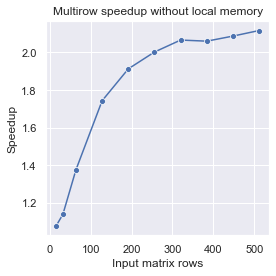

In [5]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "text" / "LocalMem")

group = benchmark.groups["multirow_for_text"]

# names = sorted(pd.concat([run.data for run in group.runs], join="inner")["Name"].unique())
# palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

data = pd.concat([run.data for run in group.runs], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input matrix rows"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (4, 4)})
fig, axes = plt.subplots()

no_local_mem = results[results["Name"] == "no_local_mem"]
local_mem = results[results["Name"] == "local_mem"]

diff = local_mem.set_index("Input matrix rows")["Compute time"] / no_local_mem.set_index("Input matrix rows")["Compute time"]

diff.name = "Speedup"
diff = diff.reset_index()
print(diff)

ax = sns.lineplot(data=diff, x="Input matrix rows", y="Speedup", marker='o', ax=axes)


ax.set_title(f"Multirow speedup without local memory")

fig.tight_layout()
fig.savefig("multirow_speedup.svg", format="svg")